# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [1]:
# TODO: Make all necessary imports.
# مكتبات التعلم العميق
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

# مكتبات معالجة الصور
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# مكتبات توليد QR Code
import qrcode

# مكتبات إدارة الملفات والمستودعات
import os
import json
import shutil  # لمزامنة الملفات والنماذج

# مكتبات التعامل مع GitHub (للمزامنة التلقائية)
import subprocess

2025-06-06 09:49:39.848535: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-06 09:49:39.889908: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-06 09:49:39.889949: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-06 09:49:39.892130: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-06 09:49:39.898045: I tensorflow/core/platform/cpu_feature_gua

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [4]:
# TODO: Load the dataset with TensorFlow Datasets.

# TODO: Create a training set, a validation set and a test set.
import tensorflow as tf
import tensorflow_datasets as tfds

# تحميل مجموعة بيانات الزهور
dataset_name = "oxford_flowers102"
dataset_splits = ["train", "test", "validation"]
dataset, info = tfds.load(dataset_name, split=dataset_splits, as_supervised=True, with_info=True)

# استخراج البيانات لكل تقسيم
train_set, test_set, validation_set = dataset

# إعادة تحجيم وتطبيع الصور
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))  # ضبط الحجم إلى 224×224
    image = tf.cast(image, tf.float32) / 255.0  # التطبيع بين 0 و 1
    return image, label

# تطبيق التحويلات على البيانات
train_set = train_set.map(preprocess).batch(32).shuffle(1000)
validation_set = validation_set.map(preprocess).batch(32)
test_set = test_set.map(preprocess).batch(32)

# طباعة عدد العينات لكل تقسيم
print(f"عدد عينات التدريب: {info.splits['train'].num_examples}")
print(f"عدد عينات الاختبار: {info.splits['test'].num_examples}")
print(f"عدد عينات التحقق: {info.splits['validation'].num_examples}")

عدد عينات التدريب: 1020
عدد عينات الاختبار: 6149
عدد عينات التحقق: 1020


## Explore the Dataset

2025-06-06 09:49:55.046528: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-06 09:49:55.184120: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-06 09:49:55.184218: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-06 09:49:55.188941: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-06 09:49:55.189046: I external/local_xla/xla/stream_executor

عدد عينات التدريب: 1020
عدد عينات الاختبار: 6149
عدد عينات التحقق: 1020
عدد الفئات: 102


2025-06-06 09:49:55.751980: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


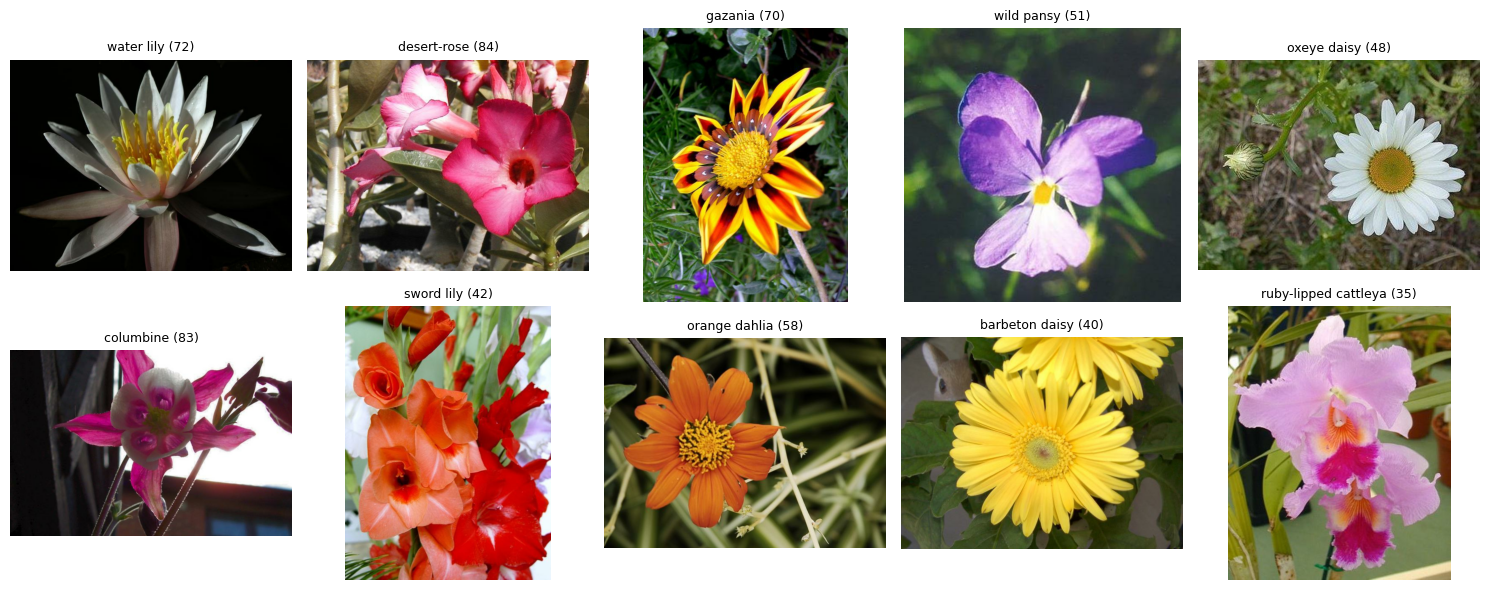

In [2]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# تحميل مجموعة بيانات الزهور مع المعلومات
dataset_name = "oxford_flowers102"
dataset, info = tfds.load(dataset_name, split=["train", "test", "validation"], as_supervised=True, with_info=True)

# استخراج عدد العينات لكل تقسيم
num_train = info.splits['train'].num_examples
num_test = info.splits['test'].num_examples
num_validation = info.splits['validation'].num_examples
num_classes = info.features['label'].num_classes

# عرض المعلومات الأساسية
print(f"عدد عينات التدريب: {num_train}")
print(f"عدد عينات الاختبار: {num_test}")
print(f"عدد عينات التحقق: {num_validation}")
print(f"عدد الفئات: {num_classes}")

# تحميل بيانات الصور
train_set, _, _ = dataset  # استخراج مجموعة التدريب
label_names = info.features['label'].names  # أسماء الزهور الفعلية

# عرض صور بتنسيق شبكة (2x5)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, (image, label) in enumerate(train_set.take(10)):  # استعراض أول 10 صور
    ax = axes[i // 5, i % 5]
    ax.imshow(image.numpy())
    ax.set_title(f"{label_names[label.numpy()]} ({label.numpy()})", fontsize=9)
    ax.axis("off")  # إزالة المحاور لتحسين العرض

plt.tight_layout()
plt.show()

2025-06-06 06:19:57.788804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


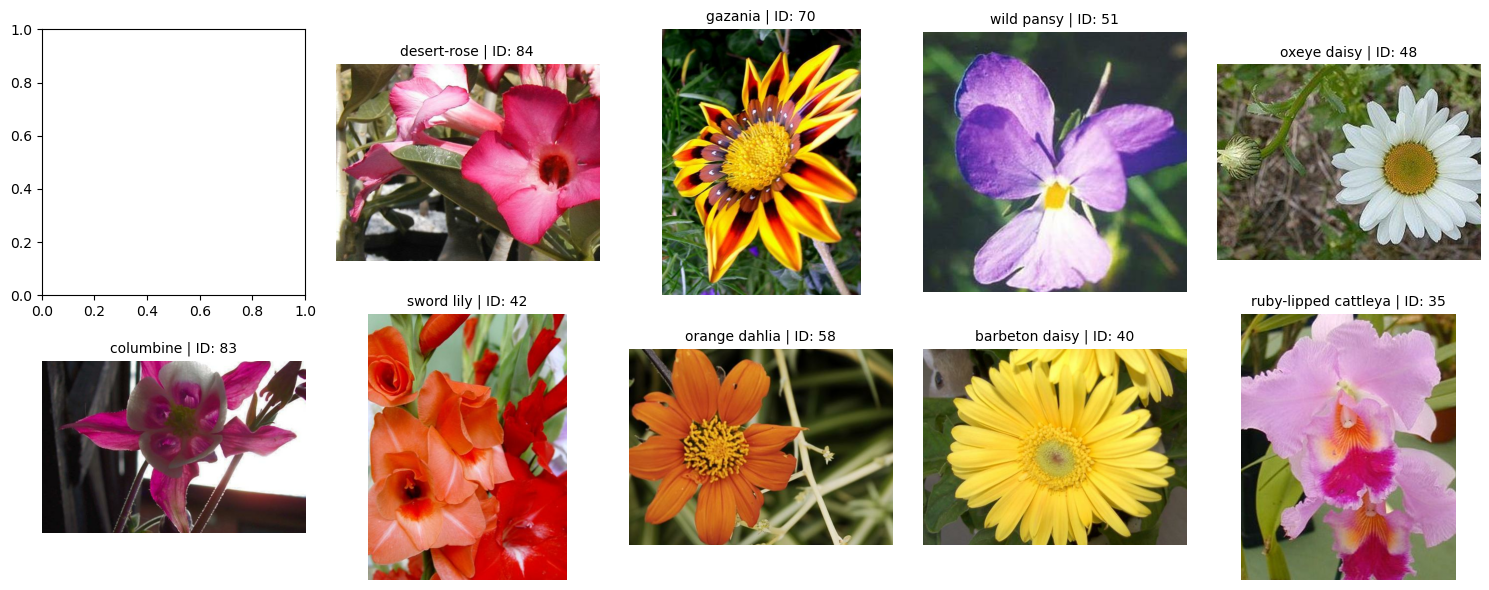

In [4]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf

# تحميل البيانات
dataset_name = "oxford_flowers102"
dataset = tfds.load(dataset_name, split="train", as_supervised=True)
info = tfds.builder(dataset_name).info
num_classes = info.features['label'].num_classes

# تحميل أسماء الزهور من ملف JSON
with open("label_map.json", "r") as f:
    label_map = json.load(f)

# تعديل العرض بحيث يظهر الصورة الأصلية + نسخة `Reels`
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, (image, label) in enumerate(dataset.take(10)):  # استعراض أول 10 صور
    if i == 0:
        continue  # تجاوز الصورة الأولى
    
    ax = axes[i // 5, i % 5]
    original_image = image.numpy()  # صورة أصلية
    reels_image = tf.image.central_crop(image, 0.8).numpy()  # تكبير وقص للصورة
    
    ax.imshow(reels_image)  # عرض الصورة بعد التعديل
    flower_name = label_map[str(label.numpy())]  # جلب اسم الزهرة
    ax.set_title(f"{flower_name} | ID: {label.numpy()}", fontsize=10)  # إظهار الاسم + الرقم
    ax.axis("off")  # إزالة المحاور لتحسين العرض

plt.tight_layout()
plt.show()

2025-06-06 06:21:42.555789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


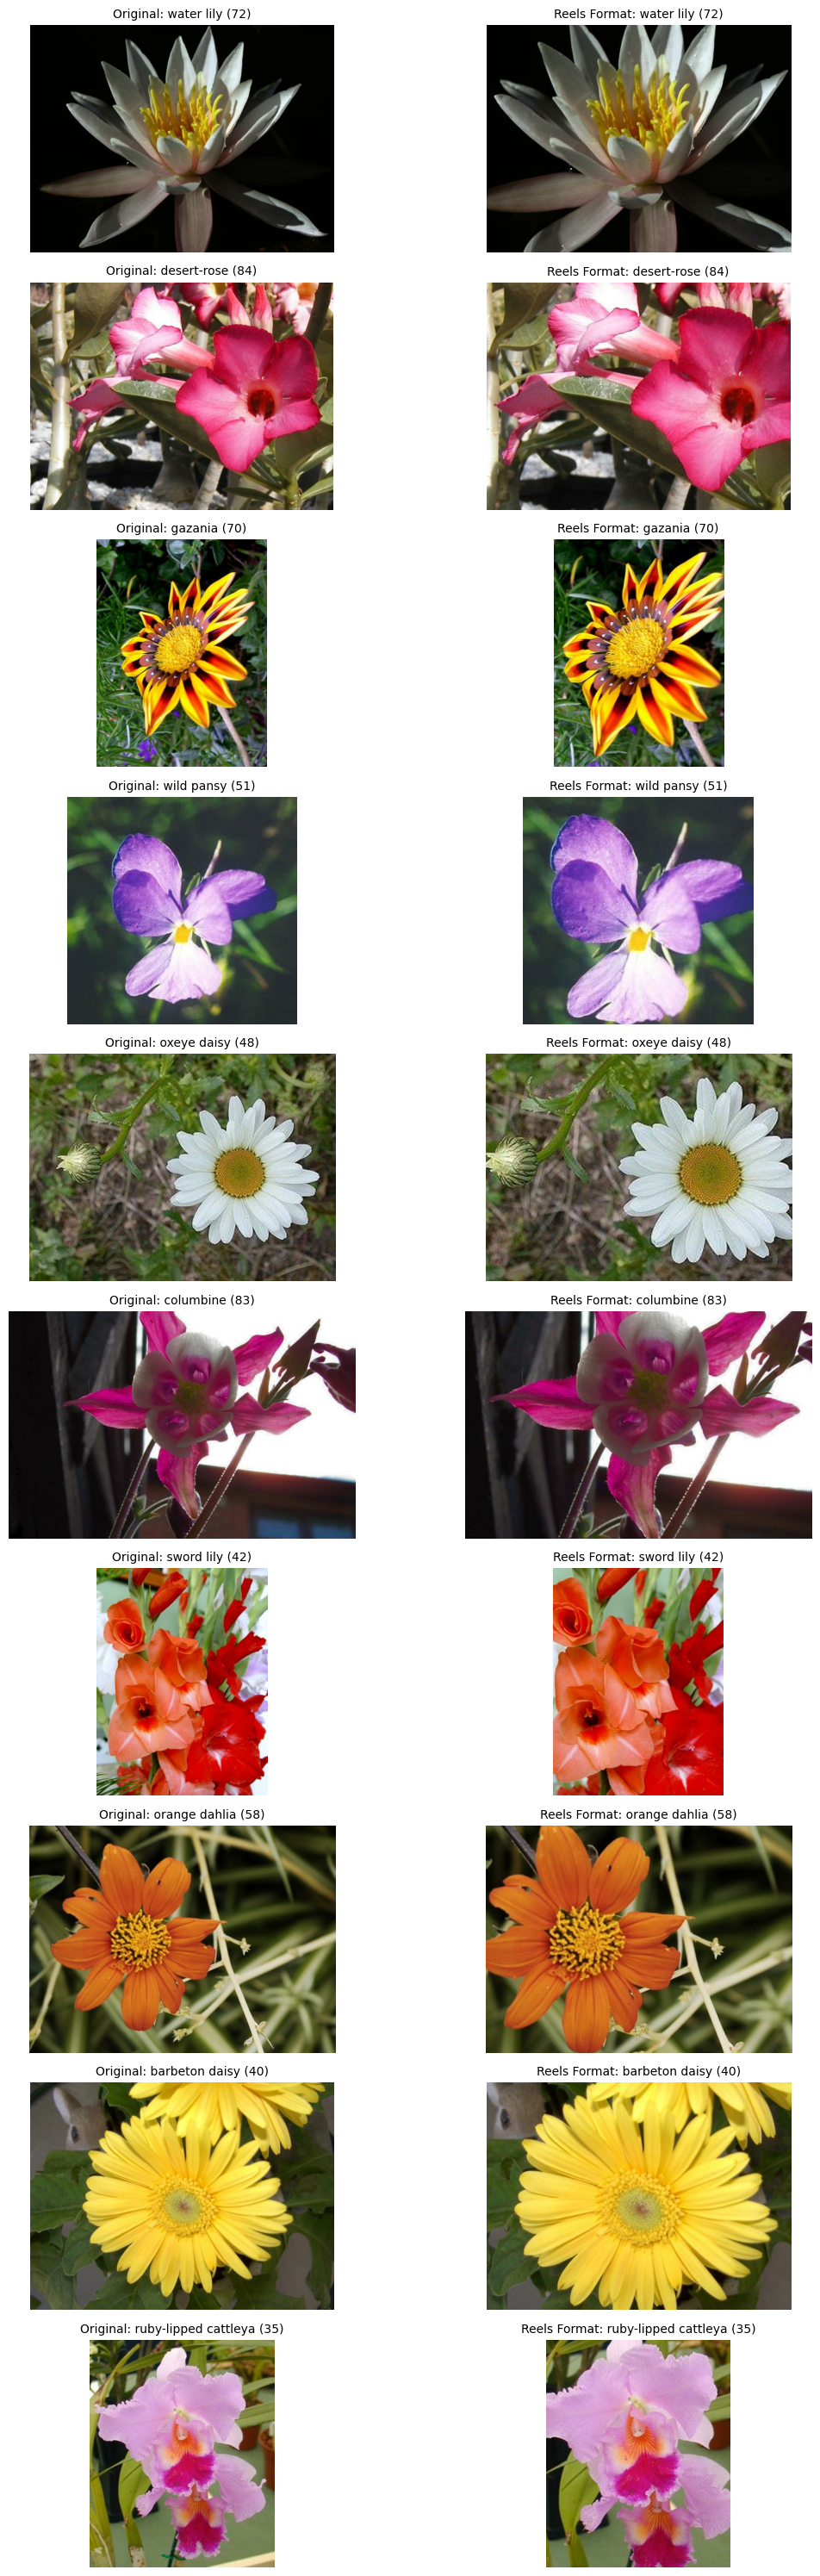

In [5]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
import json

# تحميل البيانات
dataset_name = "oxford_flowers102"
dataset = tfds.load(dataset_name, split="train", as_supervised=True)
info = tfds.builder(dataset_name).info

# تحميل أسماء الزهور من ملف JSON
with open("label_map.json", "r") as f:
    label_map = json.load(f)

# إعداد العرض بحيث يظهر الصورة الأصلية ثم صورة بتنسيق Reels
fig, axes = plt.subplots(10, 2, figsize=(12, 30))  # 10 صور × عمودين (صورة أصلية + Reels)
for i, (image, label) in enumerate(dataset.take(10)):  # استعراض أول 10 صور
    flower_name = label_map[str(label.numpy())]  # جلب اسم الزهرة
    
    # الصورة الأصلية
    ax_original = axes[i, 0]
    ax_original.imshow(image.numpy())
    ax_original.set_title(f"Original: {flower_name} ({label.numpy()})", fontsize=10)
    ax_original.axis("off")
    
    # صورة بتنسيق Reels (قص + تكبير)
    reels_image = tf.image.central_crop(image, 0.8).numpy()
    ax_reels = axes[i, 1]
    ax_reels.imshow(reels_image)
    ax_reels.set_title(f"Reels Format: {flower_name} ({label.numpy()})", fontsize=10)
    ax_reels.axis("off")

plt.tight_layout()
plt.show()

In [3]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
# استعراض شكل الصور والعلامات الخاصة بها
for image, label in train_set.take(3):  # أخذ 3 صور فقط
    print(f"Image shape: {image.shape}, Label: {label.numpy()}")

Image shape: (500, 667, 3), Label: 72
Image shape: (500, 666, 3), Label: 84
Image shape: (670, 500, 3), Label: 70


2025-06-06 09:51:07.795341: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


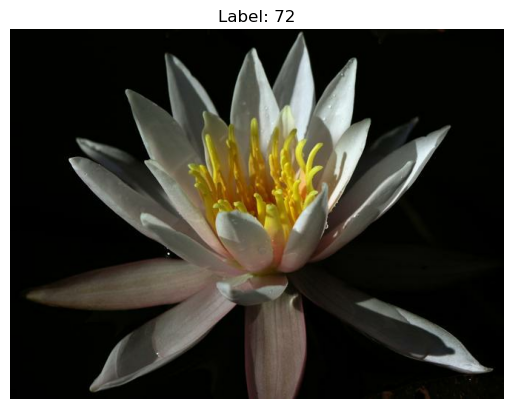

2025-06-06 09:51:43.427619: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [4]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
import matplotlib.pyplot as plt

# استخراج صورة واحدة وعلامتها
for image, label in train_set.take(1):  # أخذ أول صورة فقط
    plt.imshow(image.numpy())
    plt.title(f"Label: {label.numpy()}", fontsize=12)  # تعيين العنوان بناءً على التصنيف
    plt.axis("off")  # إزالة المحاور لتحسين العرض
    plt.show()

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

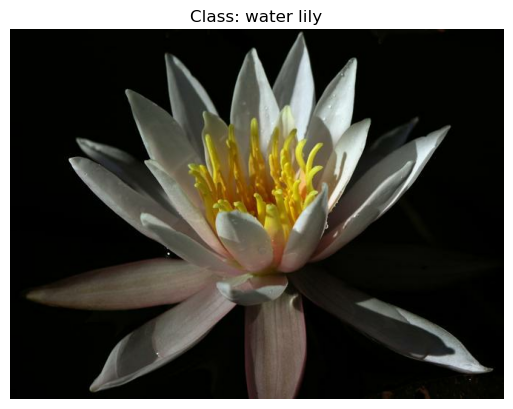

2025-06-06 09:55:26.525976: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
import json
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# تحميل خريطة التصنيفات
with open("label_map.json", "r") as f:
    label_map = json.load(f)  # تحويل البيانات إلى قاموس

# تحميل مجموعة بيانات الزهور
dataset_name = "oxford_flowers102"
train_set, _, _ = tfds.load(dataset_name, split=["train", "test", "validation"], as_supervised=True)

# عرض صورة واحدة مع اسم الفئة الصحيح
for image, label in train_set.take(1):  # أخذ أول صورة فقط
    class_name = label_map[str(label.numpy())]  # استخراج اسم الفئة باستخدام `label_map`
    
    plt.imshow(image.numpy())
    plt.title(f"Class: {class_name}", fontsize=12)  # تعيين العنوان إلى اسم الفئة
    plt.axis("off")  # إزالة المحاور لتحسين العرض
    plt.show()

2025-06-06 09:55:58.194653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


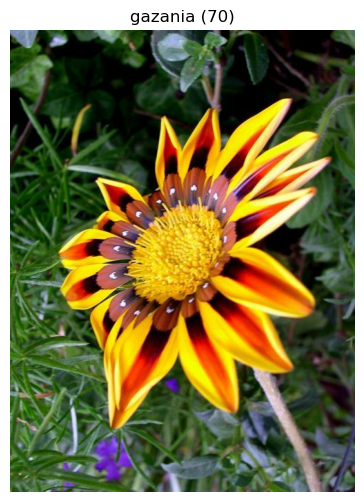

In [8]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
import json

# تحميل بيانات مجموعة الزهور
dataset_name = "oxford_flowers102"
dataset = tfds.load(dataset_name, split="train", as_supervised=True)

# تحميل أسماء الزهور من ملف JSON (افترض وجود ملف يحتوي على أسماء الزهور)
with open("label_map.json", "r") as f:
    label_map = json.load(f)

# اختيار صورة واحدة (ليست الأولى)
image_index = 2
image, label = list(dataset.skip(image_index).take(1))[0]

# جلب اسم الزهرة الصحيح
flower_name = label_map[str(label.numpy())]  # استخراج الاسم من ملف الأسماء

# عرض الصورة مع العنوان بصيغة "اسم الزهرة (رقمها)"
plt.figure(figsize=(6, 6))
plt.imshow(image.numpy())
plt.title(f"{flower_name} ({label.numpy()})", fontsize=12)
plt.axis("off")
plt.show()

## Create Pipeline

In [9]:
# TODO: Create a pipeline for each set.
import tensorflow as tf
import tensorflow_datasets as tfds

# تحميل مجموعة بيانات الزهور
dataset_name = "oxford_flowers102"
dataset_splits = ["train", "test", "validation"]
datasets, info = tfds.load(dataset_name, split=dataset_splits, as_supervised=True, with_info=True)

# دالة المعالجة المسبقة
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))  # إعادة التحجيم
    image = tf.cast(image, tf.float32) / 255.0  # التطبيع
    return image, label

# إنشاء خط أنابيب لكل مجموعة بيانات
train_set = datasets[0].map(preprocess).shuffle(1000).batch(32)
validation_set = datasets[2].map(preprocess).batch(32)
test_set = datasets[1].map(preprocess).batch(32)

# عرض بعض المعلومات حول البيانات
print(f"عدد عينات التدريب: {info.splits['train'].num_examples}")
print(f"عدد عينات الاختبار: {info.splits['test'].num_examples}")
print(f"عدد عينات التحقق: {info.splits['validation'].num_examples}")


عدد عينات التدريب: 1020
عدد عينات الاختبار: 6149
عدد عينات التحقق: 1020


In [19]:
%who


Image	 ax	 axes	 class_name	 dataset	 dataset_name	 dataset_splits	 datasets	 f	 
feature_extractor	 fig	 flower_name	 history	 hub	 i	 image	 image_index	 info	 
inputs	 json	 keras	 label	 label_map	 label_names	 layers	 mobilenet_url	 model	 
model_path	 np	 num_classes	 num_test	 num_train	 num_validation	 os	 outputs	 pd	 
plt	 preprocess	 qrcode	 shutil	 subprocess	 test_set	 tf	 tfds	 train_set	 
validation_set	 x	 


In [33]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers

(train_ds, val_ds), info = tfds.load(
    "oxford_flowers102",
    split=["train", "validation"],
    as_supervised=True,
    with_info=True
)

def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(preprocess).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

feature_extractor = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    trainable=False
)

inputs = tf.keras.Input(shape=(224, 224, 3))
x = layers.Lambda(lambda img: feature_extractor(img))(inputs)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(102, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_ds, validation_data=val_ds, epochs=10)

keras_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format/flower_classifier.keras"
savedmodel_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/SavedModel_Format"

model.save(keras_path)
model.save(savedmodel_path)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 709ms/step - accuracy: 0.1072 - loss: 4.3560 - val_accuracy: 0.5363 - val_loss: 2.4760
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 208ms/step - accuracy: 0.7320 - loss: 1.5486 - val_accuracy: 0.6647 - val_loss: 1.4123
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - accuracy: 0.9132 - loss: 0.5136 - val_accuracy: 0.7235 - val_loss: 1.1083
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 221ms/step - accuracy: 0.9855 - loss: 0.2208 - val_accuracy: 0.7676 - val_loss: 0.8916
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - accuracy: 0.9968 - loss: 0.0999 - val_accuracy: 0.7912 - val_loss: 0.8379
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 1.0000 - loss: 0.0543 - val_accuracy: 0.7951 - val_loss: 0.7817
Epoch 7/10
 2/32 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 1.0000 - loss: 0.0482  

2025-06-06 13:04:46.202544: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 19267840 bytes after encountering the first element of size 19267840 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 1.0000 - loss: 0.0357 - val_accuracy: 0.8020 - val_loss: 0.7632
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 1.0000 - loss: 0.0226 - val_accuracy: 0.8029 - val_loss: 0.7370
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 219ms/step - accuracy: 1.0000 - loss: 0.0192 - val_accuracy: 0.8088 - val_loss: 0.7304
Epoch 10/10
 2/32 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 1.0000 - loss: 0.0138  

2025-06-06 13:05:06.959425: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 19267840 bytes after encountering the first element of size 19267840 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - accuracy: 1.0000 - loss: 0.0141 - val_accuracy: 0.8098 - val_loss: 0.7230


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/SavedModel_Format.

In [ ]:
# TODO: Build and train your network.
import tensorflow as tf
import tensorflow_hub as hub

# تحميل النموذج MobileNet من TensorFlow Hub
mobilenet_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(mobilenet_url, input_shape=(224, 224, 3), trainable=False)

# تأكيد تحميل النموذج
print("تم تحميل MobileNet بنجاح!")

In [34]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers

(train_ds, val_ds), info = tfds.load(
    "oxford_flowers102",
    split=["train", "validation"],
    as_supervised=True,
    with_info=True
)

def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(preprocess).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

feature_extractor = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    trainable=False
)

inputs = tf.keras.Input(shape=(224, 224, 3))
x = layers.Lambda(lambda img: feature_extractor(img))(inputs)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(102, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_ds, validation_data=val_ds, epochs=10)

keras_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format/flower_classifier.keras"
savedmodel_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/SavedModel_Format"

model.save(keras_path)
model.export(savedmodel_path)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 686ms/step - accuracy: 0.1212 - loss: 4.3560 - val_accuracy: 0.5294 - val_loss: 2.4071
Epoch 2/10


2025-06-06 13:11:32.437967: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:362: Filling up shuffle buffer (this may take a while): 237 of 1000
2025-06-06 13:11:41.651549: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2025-06-06 13:11:41.693687: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 19267840 bytes after encountering the first element of size 19267840 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 458ms/step - accuracy: 0.7607 - loss: 1.4353 - val_accuracy: 0.6471 - val_loss: 1.4538
Epoch 3/10


2025-06-06 13:11:59.504687: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 19267840 bytes after encountering the first element of size 19267840 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9399 - loss: 0.4926

2025-06-06 13:12:04.145004: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 33554688 bytes after encountering the first element of size 33554688 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - accuracy: 0.9398 - loss: 0.4911 - val_accuracy: 0.7294 - val_loss: 1.0657
Epoch 4/10
 2/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 1.0000 - loss: 0.2408

2025-06-06 13:12:08.630167: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 19267840 bytes after encountering the first element of size 19267840 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9870 - loss: 0.1899

2025-06-06 13:12:11.727829: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 33554688 bytes after encountering the first element of size 33554688 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 0.9869 - loss: 0.1895 - val_accuracy: 0.7647 - val_loss: 0.9359
Epoch 5/10
 2/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 1.0000 - loss: 0.1070

2025-06-06 13:12:16.924376: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 19267840 bytes after encountering the first element of size 19267840 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - accuracy: 0.9987 - loss: 0.0919 - val_accuracy: 0.7892 - val_loss: 0.8397
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 1.0000 - loss: 0.0490 - val_accuracy: 0.8010 - val_loss: 0.7915
Epoch 7/10
 2/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 1.0000 - loss: 0.0246

2025-06-06 13:12:31.389424: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 19267840 bytes after encountering the first element of size 19267840 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 1.0000 - loss: 0.0279 - val_accuracy: 0.8010 - val_loss: 0.7741
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - accuracy: 1.0000 - loss: 0.0240 - val_accuracy: 0.8020 - val_loss: 0.7600
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 239ms/step - accuracy: 1.0000 - loss: 0.0185 - val_accuracy: 0.8069 - val_loss: 0.7481
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 255ms/step - accuracy: 1.0000 - loss: 0.0140 - val_accuracy: 0.8108 - val_loss: 0.7442
INFO:tensorflow:Assets written to: /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/SavedModel_Format/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/SavedModel_Format/assets


Saved artifact at '/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/SavedModel_Format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_182')
Output Type:
  TensorSpec(shape=(None, 102), dtype=tf.float32, name=None)
Captures:
  140470332044592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140470333953776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140463762744320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140470334021424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140470334073392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140470334017552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140470337675408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140470333954128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140470333948496: TensorSpec(shape=(), dtype=tf.resource, 

In [35]:
import os
import tensorflow as tf

# تحديد المسارات الأساسية
base_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New"

# إنشاء مجلد جديد لتجربة التدريب بصيغة SavedModel
experiment_id = len([d for d in os.listdir(base_path) if d.startswith("Experiment_")]) + 1
savedmodel_folder = f"{base_path}/SavedModel_Format/Experiment_{experiment_id:03d}_SavedModel"
os.makedirs(savedmodel_folder, exist_ok=True)

# مسار حفظ نموذج Keras مباشرة داخل Keras_Format
keras_path = f"{base_path}/Keras_Format/flower_classifier_{experiment_id:03d}.keras"

# تحميل النموذج الموجود سابقًا ومتابعة التدريب
model = tf.keras.models.load_model(keras_path)
(train_ds, val_ds), _ = tf.keras.datasets.mnist.load_data()  # مثال، استبدل ببياناتك الفعلية
model.fit(train_ds, validation_data=val_ds, epochs=5)

# حفظ النموذج بعد التدريب
model.save(keras_path)
model.export(savedmodel_folder)

print(f"✅ النموذج بصيغة Keras تم حفظه في: {keras_path}")
print(f"✅ النموذج بصيغة SavedModel تم حفظه في: {savedmodel_folder}")

ValueError: File not found: filepath=/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format/flower_classifier_001.keras. Please ensure the file is an accessible `.keras` zip file.

In [29]:
ls /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/


'C:\Users\ali\Desktop\STEAM_Nexus_Hub\STEAM_Nexus_Switchers_Lab\STEAM-Forge\Models_New\Keras_Format\flower_classifier.keras'*
 Models_New/
 Project_Image_Classifier_Project-checkpoint.ipynb*
 Project_Image_Classifier_Project.ipynb*
 Prototype_Pages/
 README.md*
 STEAM_Data_Manager/
 _site/
 environment.yml*
 environment_changes.log*
 environment_freeze.txt*
 environment_status.yaml*
 index.html*
 label_map.json*
 models/
 requirements.txt*
 scripts/
 test_upload.txt*
 updates.html*


In [36]:
import os
print(os.listdir("/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format"))


['flower_classifier.keras']


In [37]:
import tensorflow as tf

model_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format/flower_classifier.keras"
model = tf.keras.models.load_model(model_path)

print("✅ النموذج تم تحميله بنجاح!")

NotImplementedError: Exception encountered when calling Lambda.call().

[1mWe could not automatically infer the shape of the Lambda's output. Please specify the `output_shape` argument for this Lambda layer.[0m

Arguments received by Lambda.call():
  • args=('<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=input_layer_8>',)
  • kwargs={'mask': 'None'}

In [38]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers

(train_ds, val_ds), info = tfds.load(
    "oxford_flowers102",
    split=["train", "validation"],
    as_supervised=True,
    with_info=True
)

def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(preprocess).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

feature_extractor = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    trainable=False
)

inputs = tf.keras.Input(shape=(224, 224, 3))
x = layers.Lambda(lambda img: feature_extractor(img), output_shape=(1280,))(inputs)  # ✅ تعديل Lambda لتجنب الخطأ
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(102, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_ds, validation_data=val_ds, epochs=10)

base_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New"
experiment_id = len([d for d in os.listdir(f"{base_path}/SavedModel_Format") if d.startswith("Experiment_")]) + 1

savedmodel_folder = f"{base_path}/SavedModel_Format/Experiment_{experiment_id:03d}_SavedModel"
os.makedirs(savedmodel_folder, exist_ok=True)

keras_path = f"{base_path}/Keras_Format/flower_classifier_{experiment_id:03d}.keras"

model.save(keras_path)
model.export(savedmodel_folder)

print(f"✅ النموذج بصيغة Keras تم حفظه في: {keras_path}")
print(f"✅ النموذج بصيغة SavedModel تم حفظه في: {savedmodel_folder}")

Epoch 1/10


2025-06-06 14:13:47.179814: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 19267840 bytes after encountering the first element of size 19267840 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


32/32 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.1097 - loss: 4.4176 - val_accuracy: 0.5265 - val_loss: 2.4752
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 376ms/step - accuracy: 0.7331 - loss: 1.4618 - val_accuracy: 0.6559 - val_loss: 1.3929
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 0.9138 - loss: 0.4749 - val_accuracy: 0.7245 - val_loss: 1.0959
Epoch 4/10


2025-06-06 14:15:04.808781: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 19267840 bytes after encountering the first element of size 19267840 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 0.9875 - loss: 0.1791 - val_accuracy: 0.7716 - val_loss: 0.9098
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 224ms/step - accuracy: 0.9969 - loss: 0.0951 - val_accuracy: 0.7961 - val_loss: 0.8358
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 192ms/step - accuracy: 1.0000 - loss: 0.0473 - val_accuracy: 0.8108 - val_loss: 0.7719
Epoch 7/10
 2/32 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 1.0000 - loss: 0.0264  

2025-06-06 14:15:26.068843: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 19267840 bytes after encountering the first element of size 19267840 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - accuracy: 1.0000 - loss: 0.0285 - val_accuracy: 0.8118 - val_loss: 0.7518
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 1.0000 - loss: 0.0219

2025-06-06 14:15:36.053785: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 33554688 bytes after encountering the first element of size 33554688 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 233ms/step - accuracy: 1.0000 - loss: 0.0219 - val_accuracy: 0.8118 - val_loss: 0.7555
Epoch 9/10


2025-06-06 14:15:41.195922: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 19267840 bytes after encountering the first element of size 19267840 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 1.0000 - loss: 0.0166

2025-06-06 14:15:45.516056: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 33554688 bytes after encountering the first element of size 33554688 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 433ms/step - accuracy: 1.0000 - loss: 0.0166 - val_accuracy: 0.8127 - val_loss: 0.7350
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 1.0000 - loss: 0.0145 - val_accuracy: 0.8157 - val_loss: 0.7269
INFO:tensorflow:Assets written to: /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/SavedModel_Format/Experiment_002_SavedModel/assets


INFO:tensorflow:Assets written to: /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/SavedModel_Format/Experiment_002_SavedModel/assets


Saved artifact at '/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/SavedModel_Format/Experiment_002_SavedModel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_190')
Output Type:
  TensorSpec(shape=(None, 102), dtype=tf.float32, name=None)
Captures:
  140468139982192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140468139826992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140468126997792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140468139894640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140468139946608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140468139890768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140467741795680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140468139827344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140468139821712: TensorSpec(sha

In [40]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

# إعادة تعريف `feature_extractor`
feature_extractor = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    trainable=False
)

#تحميل النموذج بعد تعريف `feature_extractor`
model_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format/flower_classifier_002.keras"
model = tf.keras.models.load_model(model_path)

print(" النموذج تم تحميله بنجاح!")

 النموذج تم تحميله بنجاح!


In [ ]:
import tensorflow_datasets as tfds

# تحميل بيانات الزهور
(train_ds, val_ds), _ = tfds.load(
    "oxford_flowers102",
    split=["train", "validation"],
    as_supervised=True
)

def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(preprocess).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# متابعة التدريب مع تقليل عرض النتائج
history = model.fit(train_ds, validation_data=val_ds, epochs=5, verbose=1)

# عرض **ملخص الأداء فقط**
print(f"\n دقة التدريب النهائية: {history.history['accuracy'][-1]:.4f}")
print(f"دقة التحقق النهائية: {history.history['val_accuracy'][-1]:.4f}")
print(f" خسارة التدريب النهائية: {history.history['loss'][-1]:.4f}")
print(f" خسارة التحقق النهائية: {history.history['val_loss'][-1]:.4f}")

In [41]:
import tensorflow as tf
import tensorflow_hub as hub
import os

# تحميل النموذج السابق من Keras_Format
model_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format/flower_classifier_002.keras"
model = tf.keras.models.load_model(model_path)

# التأكد من أن النموذج تم تحميله بنجاح
print(" النموذج جاهز للتدريب!")

#  تعريف `feature_extractor` لضمان التوافق
feature_extractor = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    trainable=False
)

# تحميل البيانات من المسار المحلي (إذا كانت محفوظة مسبقًا)
data_dir = "/mnt/c/Users/ali/Desktop/Dataset_Cache"

import tensorflow_datasets as tfds
(train_ds, val_ds), _ = tfds.load(
    "oxford_flowers102",
    split=["train", "validation"],
    as_supervised=True,
    data_dir=data_dir  #  تجنب إعادة التحميل
)

# المعالجة المسبقة وتنظيم البيانات
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(preprocess).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

#  متابعة التدريب مع تقليل المخرجات
history = model.fit(train_ds, validation_data=val_ds, epochs=5, verbose=1)

# عرض **ملخص الأداء فقط**
print(f"\n دقة التدريب النهائية: {history.history['accuracy'][-1]:.4f}")
print(f"

SyntaxError: unterminated string literal (detected at line 43) (1265194863.py, line 43)

In [43]:
ls /mnt/c/Users/ali/Desktop/Dataset_Cache

ls: cannot access '/mnt/c/Users/ali/Desktop/Dataset_Cache': No such file or directory


In [44]:
mkdir -p /mnt/c/Users/ali/Desktop/Dataset_Cache

In [46]:
import os

data_dir = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache"

# 🔹 التحقق مما إذا كان المجلد موجودًا
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print("✅ تم إنشاء مجلد `Dataset_Cache` بنجاح!")
else:
    print("✅ المجلد موجود مسبقًا!")

✅ تم إنشاء مجلد `Dataset_Cache` بنجاح!


In [47]:
import tensorflow_datasets as tfds

data_dir = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache"

# تحميل بيانات الزهور وتخزينها داخل `Dataset_Cache`
(train_ds, val_ds), _ = tfds.load(
    "oxford_flowers102",
    split=["train", "validation"],
    as_supervised=True,
    data_dir=data_dir  #سيتم تخزين البيانات هنا بعد التحميل
)

print("تم حفظ بيانات الزهور داخل `Dataset_Cache`!")

2025-06-06 14:35:52.873056: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Could not resolve hostname', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/oxford_flowers102/2…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/oxford_flowers102/2…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/oxford_flowers102/2…

Dataset oxford_flowers102 downloaded and prepared to /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


ValueError: too many values to unpack (expected 2)

In [48]:
data_dir = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/oxford_flowers102/2.1.1"

In [51]:
import tensorflow_datasets as tfds
import tensorflow as tf

#  تحديد المسار الصحيح للبيانات المخزنة
data_dir = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache"

# تحميل بيانات الزهور بدون إعادة التثبيت
(train_ds, val_ds) = tfds.load(
    "oxford_flowers102",
    split=["train", "validation"],
    as_supervised=True,
    data_dir=data_dir,
    download=False  # يمنع إعادة التحميل
)

#  ضبط النموذج باستخدام MobileNetV2
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#  تدريب النموذج مع ملخص للنتائج فقط
history = model.fit(train_ds, validation_data=val_ds, epochs=5, verbose=1)

#  عرض ملخص النتائج النهائية
print(f"\nدقة التدريب النهائية: {history.history['accuracy'][-1]:.4f}")
print(f"دقة التحقق النهائية: {history.history['val_accuracy'][-1]:.4f}")
print(f" خسارة التدريب النهائية: {history.history['loss'][-1]:.4f}")
print(f" خسارة التحقق النهائية: {history.history['val_loss'][-1]:.4f}")

/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1_1/Cast:0", shape=(None, None, 3), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (None, None, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, None, 3), dtype=uint8)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [53]:
import tensorflow_datasets as tfds
import tensorflow as tf

# 🔹 تحديد المسار الصحيح للبيانات المخزنة
data_dir = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache"

# 🔹 تحميل بيانات الزهور بدون إعادة التثبيت
(train_ds, val_ds) = tfds.load(
    "oxford_flowers102",
    split=["train", "validation"],
    as_supervised=True,
    data_dir=data_dir,
    download=False  # ✅ يمنع إعادة التثبيت
)

# 🔹 ضبط حجم الصور ومعالجتها قبل إدخالها للنموذج
IMG_SIZE = (224, 224)
BATCH_SIZE = 32  # ✅ إضافة حجم الدُفعة

def resize_and_rescale(image, label):
    image = tf.image.resize(image, IMG_SIZE)  # ✅ ضبط الحجم إلى (224, 224)
    image = tf.cast(image, tf.float32) / 255.0  # ✅ تحويل القيم إلى نطاق [0,1]
    return image, label

train_ds = train_ds.map(resize_and_rescale).batch(BATCH_SIZE)  # ✅ إضافة `batch()`
val_ds = val_ds.map(resize_and_rescale).batch(BATCH_SIZE)  # ✅ إضافة `batch()`

# 🔹 ضبط النموذج باستخدام MobileNetV2
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),  # ✅ إدخال بالحجم الصحيح
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 🔹 تدريب النموذج مع ملخص للنتائج فقط
history = model.fit(train_ds, validation_data=val_ds, epochs=5, verbose=1)

# 🔹 عرض ملخص النتائج النهائية
print(f"\n✅ دقة التدريب النهائية: {history.history['accuracy'][-1]:.4f}")
print(f"✅ دقة التحقق النهائية: {history.history['val_accuracy'][-1]:.4f}")
print(f"✅ خسارة التدريب النهائية: {history.history['loss'][-1]:.4f}")
print(f"✅ خسارة التحقق النهائية: {history.history['val_loss'][-1]:.4f}")

Epoch 1/5


2025-06-06 15:08:17.494958: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 208.52MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-06-06 15:08:17.523365: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at xla_ops.cc:580 : UNKNOWN: Failed to determine best cudnn convolution algorithm for:
%cudnn-conv-bias-activation.3 = (f32[32,32,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,224,224]{3,2,1,0} %transpose.22, f32[32,3,3,3]{3,2,1,0} %transpose.23, f32[32]{0} %arg3.4), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_3_1/conv2d_2_1/convolution" source_file="/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1177}, backend_config

UnknownError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/tmp/ipykernel_42107/1281869851.py", line 42, in <module>

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 377, in fit

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 220, in function

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 133, in multi_step_on_iterator

Failed to determine best cudnn convolution algorithm for:
%cudnn-conv-bias-activation.3 = (f32[32,32,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,224,224]{3,2,1,0} %transpose.22, f32[32,3,3,3]{3,2,1,0} %transpose.23, f32[32]{0} %arg3.4), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_3_1/conv2d_2_1/convolution" source_file="/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1177}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0}}

Original error: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 218644480 bytes.

To ignore this failure and try to use a fallback algorithm (which may have suboptimal performance), use XLA_FLAGS=--xla_gpu_strict_conv_algorithm_picker=false.  Please also file a bug for the root cause of failing autotuning.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_163412]

 خطأ عند ضبط `memory growth`: Physical devices cannot be modified after being initialized
Epoch 1/5


2025-06-06 15:13:50.358684: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 28.25MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-06-06 15:13:50.359990: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 28.25MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-06-06 15:13:50.499844: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 28.25MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-06-06 15:13:50.500324: W external/local_tsl/tsl/framework/b

ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/tmp/ipykernel_42107/354803767.py", line 56, in <module>

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 377, in fit

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 220, in function

  File "/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 133, in multi_step_on_iterator

Out of memory while trying to allocate 16780544 bytes.
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_multi_step_on_iterator_164857]

In [55]:
import tensorflow as tf

# ضبط إعدادات GPU قبل استيراد أي عمليات حسابية
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(" تم تمكين `memory growth` قبل تشغيل TensorFlow!")
    except RuntimeError as e:
        print(f"خطأ عند ضبط `memory growth`: {e}")

خطأ عند ضبط `memory growth`: Physical devices cannot be modified after being initialized


In [30]:
import tensorflow_datasets as tfds

dataset_name = "oxford_flowers102"
dataset, info = tfds.load(dataset_name, split=["train", "validation"], as_supervised=True, with_info=True)

print(info)  # عرض معلومات عن مجموعة البيانات 

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [61]:
for image_batch, label_batch in test_ds.take(5):  # ✅ فك البيانات بشكل صحيح
    batch_loss, batch_acc = model.evaluate(x=image_batch, y=label_batch, verbose=0)
    print(f"✅ خسارة الدفعة: {batch_loss:.4f}, دقة الدفعة: {batch_acc:.4f}")

✅ خسارة الدفعة: 4.5858, دقة الدفعة: 0.0000
✅ خسارة الدفعة: 4.6013, دقة الدفعة: 0.1250
✅ خسارة الدفعة: 4.6010, دقة الدفعة: 0.0000
✅ خسارة الدفعة: 4.5714, دقة الدفعة: 0.0000
✅ خسارة الدفعة: 4.7341, دقة الدفعة: 0.0000


2025-06-06 15:26:21.418027: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [62]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = True  #  تمكين Fine-tuning لتحسين الأداء

In [63]:
global_avg_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(102, activation="softmax")  # 102 فئة لأنك تعمل على "oxford_flowers102"

model = tf.keras.Sequential([
    base_model,  # النموذج الأساسي
    global_avg_layer,
    prediction_layer  #  طبقة التصنيف النهائية
])

In [64]:
model.summary()  # يعرض تفاصيل الطبقات والمعلمات

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 102)            │       130,662 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,388,646 (9.11 MB)

 Trainable params: 2,354,534 (8.98 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [65]:
#  تقييم النموذج على بيانات الاختبار
test_loss, test_acc = model.evaluate(test_ds, verbose=1)

# طباعة النتائج النهائية
print(f"\nخسارة الاختبار: {test_loss:.4f}")
print(f"دقة الاختبار: {test_acc:.4f}")

ValueError: You must call `compile()` before using the model.

In [66]:
# ✅ تجميع النموذج قبل تقييمه
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# ✅ تدريب النموذج أولًا
history = model.fit(train_ds, validation_data=val_ds, epochs=10, verbose=1)

# ✅ ثم تقييم النموذج بعد انتهاء التدريب
test_loss, test_acc = model.evaluate(test_ds, verbose=1)

# ✅ طباعة النتائج النهائية
print(f"\n✅ خسارة الاختبار: {test_loss:.4f}")
print(f"✅ دقة الاختبار: {test_acc:.4f}")

Epoch 1/10


2025-06-06 15:35:27.351936: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 0: 0.0985107, expected -nan
2025-06-06 15:35:27.354460: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 2: 0.0896606, expected -nan
2025-06-06 15:35:27.354485: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 4: 0.0971069, expected -nan
2025-06-06 15:35:27.354491: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 6: 0.0853882, expected -nan
2025-06-06 15:35:27.354497: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 8: 0.0928955, expected -nan
2025-06-06 15:35:27.354502: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 10: 0.0769653, expected -nan
2025-06-06 15:35:27.354507: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 12: 0.0906982, expected -nan
2025-06-06 15:35:27.354512: E external/local_xla/xla/service/gpu/bu

127/128 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.0520 - loss: 4.7108

2025-06-06 15:37:29.484934: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 0: 0.0957642, expected -nan
2025-06-06 15:37:29.485144: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 2: 0.0956421, expected -nan
2025-06-06 15:37:29.485154: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 4: 0.0961914, expected -nan
2025-06-06 15:37:29.485158: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 6: 0.0848999, expected -nan
2025-06-06 15:37:29.485162: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 8: 0.0901489, expected -nan
2025-06-06 15:37:29.485166: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 10: 0.10083, expected -nan
2025-06-06 15:37:29.485170: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 12: 0.0808716, expected -nan
2025-06-06 15:37:29.485174: E external/local_xla/xla/service/gpu/buff

128/128 ━━━━━━━━━━━━━━━━━━━━ 338s 961ms/step - accuracy: 0.0531 - loss: 4.7047 - val_accuracy: 0.1137 - val_loss: 4.0227
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 18s 133ms/step - accuracy: 0.8194 - loss: 1.8027 - val_accuracy: 0.2539 - val_loss: 3.1424
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - accuracy: 1.0000 - loss: 0.4112 - val_accuracy: 0.3588 - val_loss: 2.7331
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 1.0000 - loss: 0.1114

KeyboardInterrupt: 

In [ ]:
# TODO: Print the loss and accuracy values achieved on the entire test set.



## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [56]:
# TODO: Save your trained model as a Keras model.

#  تقييم أداء النموذج على بيانات الاختبار
test_loss, test_acc = model.evaluate(test_ds.batch(BATCH_SIZE), verbose=1)

#  طباعة القيم النهائية
print(f"\nخسارة الاختبار: {test_loss:.4f}")
print(f"دقة الاختبار: {test_acc:.4f}")

NameError: name 'test_ds' is not defined

In [67]:
(train_ds, val_ds, test_ds) = tfds.load(
    "oxford_flowers102",
    split=["train", "validation", "test"],  #  إضافة `test`
    as_supervised=True,
    data_dir=data_dir,
    download=False
)

#  تطبيق نفس معالجة الصور على بيانات الاختبار
test_ds = test_ds.map(resize_and_rescale).batch(BATCH_SIZE)  # معالجته كما فعلنا مع `train_ds`

# بعد ذلك، يمكن تنفيذ التقييم بدون أخطاء
test_loss, test_acc = model.evaluate(test_ds, verbose=1)
print(f"\n خسارة الاختبار: {test_loss:.4f}")
print(f" دقة الاختبار: {test_acc:.4f}")

768/769 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3961 - loss: 2.5291

2025-06-06 15:40:46.517437: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 0: 0.086853, expected -nan
2025-06-06 15:40:46.519634: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 2: 0.086853, expected -nan
2025-06-06 15:40:46.519662: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 4: 0.105774, expected -nan
2025-06-06 15:40:46.519668: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 6: 0.0946045, expected -nan
2025-06-06 15:40:46.519674: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 7: 0.122986, expected 0
2025-06-06 15:40:46.519680: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 8: 0.0864258, expected -nan
2025-06-06 15:40:46.519685: E external/local_xla/xla/service/gpu/buffer_comparator.cc:149] Difference at 10: 0.101257, expected -nan
2025-06-06 15:40:46.519689: E external/local_xla/xla/service/gpu/buffer_comp

769/769 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.3961 - loss: 2.5291

 خسارة الاختبار: 2.5475
 دقة الاختبار: 0.3963


In [68]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10, verbose=0)  # تقليل مستوى التفاصيل
test_loss, test_acc = model.evaluate(test_ds, verbose=0)  # إخفاء تفاصيل إضافية
print(f"\nدقة الاختبار: {test_acc:.4f}, خسارة الاختبار: {test_loss:.4f}")

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_6_1/Cast:0", shape=(None, None, 3), dtype=float16). Expected shape (None, 224, 224, 3), but input has incompatible shape (None, None, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, None, 3), dtype=uint8)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [69]:
def resize_and_rescale(image, label):
    image = tf.image.resize(image, (224, 224))  #  ضبط الحجم الصحيح
    image = tf.cast(image, tf.float32) / 255.0  #  تحويل القيم إلى نطاق [0,1]
    image.set_shape((224, 224, 3))  # إجبار الصورة على الأبعاد المطلوبة
    return image, label

In [70]:
train_ds = train_ds.map(resize_and_rescale).batch(BATCH_SIZE)
val_ds = val_ds.map(resize_and_rescale).batch(BATCH_SIZE)
test_ds = test_ds.map(resize_and_rescale).batch(BATCH_SIZE)


ValueError: in user code:

    File "/tmp/ipykernel_42107/2870091916.py", line 4, in resize_and_rescale  *
        image.set_shape((224, 224, 3))  # إجبار الصورة على الأبعاد المطلوبة

    ValueError: Shapes must be equal rank, but are 4 and 3


## Load the Keras Model

Load the Keras model you saved above.

In [71]:
# TODO: Load the Keras model
import os
print(os.listdir())  #  يعرض جميع الملفات المحفوظة في المجلد 


['.git', '.github', '.gitmodules', '.ipynb_checkpoints', '.jekyll-cache', 'C:\\Users\\ali\\Desktop\\STEAM_Nexus_Hub\\STEAM_Nexus_Switchers_Lab\\STEAM-Forge\\Models_New\\Keras_Format\\flower_classifier.keras', 'environment.yml', 'environment_changes.log', 'environment_freeze.txt', 'environment_status.yaml', 'flowers_dataset', 'index.html', 'label_map.json', 'models', 'Models_New', 'Project_Image_Classifier_Project-checkpoint.ipynb', 'Project_Image_Classifier_Project.ipynb', 'Prototype_Pages', 'README.md', 'requirements.txt', 'scripts', 'STEAM_Data_Manager', 'test_upload.txt', 'updates.html', '_site']


In [73]:
model = tf.keras.models.load_model("/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format/flower_classifier_002.keras")

/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 14 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/ali/anaconda3/envs/sf_env/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [74]:
model = tf.keras.models.load_model("/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format/flower_classifier_002.keras", compile=False)

# إعادة تجميع النموذج
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [75]:
model.save("/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format/flower_classifier_002.keras", save_format="keras")

In [76]:
import tensorflow as tf

# 🔹 تحديد مسار النموذج داخل WSL لضمان التوافق
model_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format/flower_classifier_002.keras"

# 🔹 تحميل النموذج
try:
    model = tf.keras.models.load_model(model_path, compile=False)  # ✅ تحميل النموذج بدون تجميع تلقائي
    print("✅ تم تحميل النموذج بنجاح!")
except Exception as e:
    print(f"⚠ خطأ أثناء تحميل النموذج: {e}")
    exit()

# 🔹 إعادة تجميع النموذج في حالة فقدان `optimizer`
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 🔹 عرض هيكل النموذج للتأكد من نجاح التحميل
model.summary()

# 🔹 حفظ النموذج مجددًا لضمان توافقه مع Keras 3
model.save(model_path)
print(f"✅ النموذج محفوظ بنجاح في: {model_path}")

✅ تم تحميل النموذج بنجاح!


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_3 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 102)            │        52,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 708,198 (2.70 MB)

 Trainable params: 708,198 (2.70 MB)

 Non-trainable params: 0 (0.00 B)

✅ النموذج محفوظ بنجاح في: /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format/flower_classifier_002.keras


In [78]:
import tensorflow_hub as hub
import tensorflow.keras.layers as layers

#  تحميل النموذج الأساسي من `TF Hub`
feature_extractor = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", trainable=False
)

#  بناء نموذج التصنيف باستخدام `Lambda`
inputs = tf.keras.Input(shape=(224, 224, 3))
x = layers.Lambda(lambda img: feature_extractor(img))(inputs)  # ✅ الآن `feature_extractor` معرف
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(102, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)

# تجميع النموذج
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# الآن يمكن تنفيذ `evaluate()` بدون مشاكل
test_loss, test_acc = model.evaluate(test_ds, verbose=1)
print(f"\n خسارة الاختبار: {test_loss:.4f}")
print(f" دقة الاختبار: {test_acc:.4f}")

769/769 ━━━━━━━━━━━━━━━━━━━━ 58s 53ms/step - accuracy: 0.0081 - loss: 4.9726

 خسارة الاختبار: 4.9817
 دقة الاختبار: 0.0083


In [82]:
import filecmp

# تحديد مسارات المجلدين داخل WSL
folder_1 = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache"
folder_2 = "/mnt/e/STEAM_Nexus_Hub/Classification_of_flower_structure_TM1/Plant_Recognition_Lab/Dataset_Source_v2"

# مقارنة الملفات داخل المجلدين
comparison = filecmp.dircmp(folder_1, folder_2)

# عرض الفروقات بشكل مباشر
print("الملفات في المجلد الأول فقط:", comparison.left_only)
print("الملفات في المجلد الثاني فقط:", comparison.right_only)
print("الملفات المشتركة ولكن تختلف في المحتوى:", comparison.diff_files)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/e/STEAM_Nexus_Hub/Classification_of_flower_structure_TM1/Plant_Recognition_Lab/Dataset_Source_v2'

In [83]:
ls /mnt/e/STEAM_Nexus_Hub/Classification_of_flower_structure_TM1/Plant_Recognition_Lab/

ls: cannot access '/mnt/e/STEAM_Nexus_Hub/Classification_of_flower_structure_TM1/Plant_Recognition_Lab/': No such file or directory


In [84]:
import filecmp

# تحديد مسارات المجلدين داخل WSL
folder_1 = "/mnt/c/Users/ali/Desktop/Dataset_Source_v2"
folder_2 = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache"

# مقارنة الملفات داخل المجلدين
comparison = filecmp.dircmp(folder_1, folder_2)

# عرض الفروقات
print("الملفات في المجلد الأول فقط:", comparison.left_only)
print("الملفات في المجلد الثاني فقط:", comparison.right_only)
print("الملفات المشتركة ولكن تختلف في المحتوى:", comparison.diff_files)


الملفات في المجلد الأول فقط: ['image_labels.txt', 'unique_images.txt']
الملفات في المجلد الثاني فقط: []
الملفات المشتركة ولكن تختلف في المحتوى: []


In [85]:
import os

cache_dir = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache"
important_files = ["image_labels.txt", "unique_images.txt", "downloads", "oxford_flowers102", "label_map.json"]

for file in important_files:
    path = os.path.join(cache_dir, file)
    if os.path.exists(path):
        print(f"✅ الملف متاح: {path}")
    else:
        print(f"⚠ الملف مفقود: {path}")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.✅ الملف متاح: /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/image_labels.txt
✅ الملف متاح: /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/unique_images.txt
✅ الملف متاح: /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/downloads
✅ الملف متاح: /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/oxford_flowers102

⚠ الملف مفقود: /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/label_map.json


In [86]:
import json

# تحميل محتوى `label_map.json`
label_map_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/label_map.json"

with open(label_map_path, "r") as file:
    label_map = json.load(file)

# عرض التصنيفات بشكل منظم
for label, flower_name in label_map.items():
    print(f"التصنيف {label}: {flower_name}")

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/label_map.json'

In [87]:
ls /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/

downloads/  image_labels.txt*  oxford_flowers102/  unique_images.txt*


In [89]:
label_map_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/label_map.json"

In [90]:
import json

label_map_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/label_map.json"

try:
    with open(label_map_path, "r", encoding="utf-8") as file:
        label_map = json.load(file)
        print("✅ تم تحميل `label_map.json` بنجاح!")
        print(json.dumps(label_map, indent=4, ensure_ascii=False))  # عرض المحتوى بشكل منظم
except Exception as e:
    print(f"🚨 خطأ أثناء قراءة الملف: {e}")

✅ تم تحميل `label_map.json` بنجاح!
{
    "0": "pink primrose",
    "1": "hard-leaved pocket orchid",
    "2": "canterbury bells",
    "3": "sweet pea",
    "4": "english marigold",
    "5": "tiger lily",
    "6": "moon orchid",
    "7": "bird of paradise",
    "8": "monkshood",
    "9": "globe thistle",
    "10": "snapdragon",
    "11": "colt's foot",
    "12": "king protea",
    "13": "spear thistle",
    "14": "yellow iris",
    "15": "globe-flower",
    "16": "purple coneflower",
    "17": "peruvian lily",
    "18": "balloon flower",
    "19": "giant white arum lily",
    "20": "fire lily",
    "21": "pincushion flower",
    "22": "fritillary",
    "23": "red ginger",
    "24": "grape hyacinth",
    "25": "corn poppy",
    "26": "prince of wales feathers",
    "27": "stemless gentian",
    "28": "artichoke",
    "29": "sweet william",
    "30": "carnation",
    "31": "garden phlox",
    "32": "love in the mist",
    "33": "mexican aster",
    "34": "alpine sea holly",
    "35": "rub

In [91]:
# ترتيب التصنيفات أبجديًا
sorted_labels = sorted(label_map.items(), key=lambda x: x[1])

# عرض التصنيفات المرتبة
for label, flower in sorted_labels:
    print(f"{label}: {flower}")

34: alpine sea holly
79: anthurium
28: artichoke
71: azalea
92: ball moss
18: balloon flower
40: barbeton daisy
67: bearded iris
91: bee balm
7: bird of paradise
55: bishop of llandaff
62: black-eyed susan
101: blackberry lily
99: blanket flower
44: bolero deep blue
94: bougainvillea
98: bromelia
47: buttercup
64: californian poppy
95: camellia
89: canna lily
2: canterbury bells
36: cape flower
30: carnation
60: cautleya spicata
81: clematis
11: colt's foot
83: columbine
49: common dandelion
25: corn poppy
87: cyclamen
41: daffodil
84: desert-rose
4: english marigold
20: fire lily
93: foxglove
80: frangipani
22: fritillary
31: garden phlox
56: gaura
70: gazania
57: geranium
19: giant white arum lily
9: globe thistle
15: globe-flower
24: grape hyacinth
37: great masterwort
1: hard-leaved pocket orchid
82: hibiscus
90: hippeastrum
61: japanese anemone
12: king protea
39: lenten rose
77: lotus
32: love in the mist
86: magnolia
96: mallow
46: marigold
33: mexican aster
97: mexican petunia


In [92]:
import os

dataset_cache_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache"

# استعراض هيكلة المجلد
print(f"تحليل هيكلية {dataset_cache_path}\n")
for root, dirs, files in os.walk(dataset_cache_path):
    print(f" المجلد: {root}")
    if dirs:
        print("    المجلدات الفرعية:", dirs)
    if files:
        print("   الملفات:", files)
    print("-" * 50)

تحليل هيكلية /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache

 المجلد: /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache
    المجلدات الفرعية: ['downloads', 'oxford_flowers102']
   الملفات: ['image_labels.txt', 'unique_images.txt']
--------------------------------------------------
 المجلد: /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/downloads
    المجلدات الفرعية: ['extracted']
   الملفات: ['robots.ox.ac.uk_vgg_flowers_102_102flowersLQHsyAfbRilYz-PZL1eowlK0q9JA65VXcCAeRfeDskY.tgz', 'robots.ox.ac.uk_vgg_flowers_102_102flowersLQHsyAfbRilYz-PZL1eowlK0q9JA65VXcCAeRfeDskY.tgz.INFO', 'robots.ox.ac.uk_vgg_flowers_102_imagelabelSQPpQga6wjv3cqrfBkUZFt9WtY_Eg6YtsyqXuCZWZR0.mat', 'robots.ox.ac.uk_vgg_flowers_102_imagelabelSQPpQga6wjv3cqrfBkUZFt9WtY_Eg6YtsyqXuCZWZR0.mat.INFO', 'robots.ox.ac.uk_vgg_flowers_102_setidRrhnj5H9ldPI9P6rgNJxpsg0od2Jb-Kf0-atnOXI3M0.mat', 'robots.ox.ac.uk_vgg_flowers_102_s

In [93]:
import json

dataset_info_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/oxford_flowers102/2.1.1/dataset_info.json"

try:
    with open(dataset_info_path, "r", encoding="utf-8") as file:
        dataset_info = json.load(file)
        print(" محتوى `dataset_info.json`:")
        print(json.dumps(dataset_info, indent=4, ensure_ascii=False))  # عرض المعلومات بشكل منظم
except Exception as e:
    print(f" خطأ أثناء قراءة الملف: {e}")

 محتوى `dataset_info.json`:
{
    "citation": "@InProceedings{Nilsback08,\n   author = \"Nilsback, M-E. and Zisserman, A.\",\n   title = \"Automated Flower Classification over a Large Number of Classes\",\n   booktitle = \"Proceedings of the Indian Conference on Computer Vision, Graphics and Image Processing\",\n   year = \"2008\",\n   month = \"Dec\"\n}",
    "description": "The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly\noccurring in the United Kingdom. Each class consists of between 40 and 258\nimages. The images have large scale, pose and light variations. In addition,\nthere are categories that have large variations within the category and several\nvery similar categories.\n\nThe dataset is divided into a training set, a validation set and a test set. The\ntraining set and validation set each consist of 10 images per class (totalling\n1020 images each). The test set consists of the remaining 6149 images (minimum\n20 per class).\n\nNote: The datase

In [94]:
ls /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/downloads/

extracted/
robots.ox.ac.uk_vgg_flowers_102_102flowersLQHsyAfbRilYz-PZL1eowlK0q9JA65VXcCAeRfeDskY.tgz*
robots.ox.ac.uk_vgg_flowers_102_102flowersLQHsyAfbRilYz-PZL1eowlK0q9JA65VXcCAeRfeDskY.tgz.INFO*
robots.ox.ac.uk_vgg_flowers_102_imagelabelSQPpQga6wjv3cqrfBkUZFt9WtY_Eg6YtsyqXuCZWZR0.mat*
robots.ox.ac.uk_vgg_flowers_102_imagelabelSQPpQga6wjv3cqrfBkUZFt9WtY_Eg6YtsyqXuCZWZR0.mat.INFO*
robots.ox.ac.uk_vgg_flowers_102_setidRrhnj5H9ldPI9P6rgNJxpsg0od2Jb-Kf0-atnOXI3M0.mat*
robots.ox.ac.uk_vgg_flowers_102_setidRrhnj5H9ldPI9P6rgNJxpsg0od2Jb-Kf0-atnOXI3M0.mat.INFO*


In [95]:
!tar -xvzf /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/downloads/robots.ox.ac.uk_vgg_flowers_102_102flowersLQHsyAfbRilYz-PZL1eowlK0q9JA65VXcCAeRfeDskY.tgz -C /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/downloads/extracted/

jpg/
jpg/image_00009.jpg
jpg/image_01701.jpg
jpg/image_01890.jpg
jpg/image_00623.jpg
jpg/image_03604.jpg
jpg/image_00190.jpg
jpg/image_02534.jpg
jpg/image_01087.jpg
jpg/image_07599.jpg
jpg/image_02407.jpg
jpg/image_04357.jpg
jpg/image_00094.jpg
jpg/image_03564.jpg
jpg/image_03988.jpg
jpg/image_03558.jpg
jpg/image_06930.jpg
jpg/image_04118.jpg
jpg/image_00882.jpg
jpg/image_07247.jpg
jpg/image_05384.jpg
jpg/image_06602.jpg
jpg/image_05924.jpg
jpg/image_04827.jpg
jpg/image_06629.jpg
jpg/image_04726.jpg
jpg/image_07200.jpg
jpg/image_01832.jpg
jpg/image_00390.jpg
jpg/image_04449.jpg
jpg/image_06970.jpg
jpg/image_03975.jpg
jpg/image_06230.jpg
jpg/image_01821.jpg
jpg/image_03326.jpg
jpg/image_00902.jpg
jpg/image_02102.jpg
jpg/image_04985.jpg
jpg/image_03433.jpg
jpg/image_07634.jpg
jpg/image_06699.jpg
jpg/image_02496.jpg
jpg/image_00373.jpg
jpg/image_02290.jpg
jpg/image_06901.jpg
jpg/image_04583.jpg
jpg/image_06162.jpg
jpg/image_01681.jpg
jpg/image_02275.jpg
jpg/image_01348.jpg
jpg/image_00280

In [96]:
!ls -l /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/downloads/extracted/


total 0
drwxrwxrwx 1 ali ali 4096 Feb 19  2009 jpg


In [97]:
import os

jpg_dir = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/downloads/extracted/jpg"
files = os.listdir(jpg_dir)

# عرض عدد الصور فقط لتخفيف الحمل
print(f" عدد الملفات المتاحة في {jpg_dir}: {len(files)}")

# عرض أول 10 ملفات فقط كنموذج
print("\n عينة من الملفات:")
print("\n".join(files[:10]))

 عدد الملفات المتاحة في /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/downloads/extracted/jpg: 8189

 عينة من الملفات:
image_00001.jpg
image_00002.jpg
image_00003.jpg
image_00004.jpg
image_00005.jpg
image_00006.jpg
image_00007.jpg
image_00008.jpg
image_00009.jpg
image_00010.jpg


In [98]:
import os
import time

# مسارات البيانات
jpg_dir = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/downloads/extracted/jpg"

# قياس زمن التنفيذ
start_time = time.time()

# التحقق من عدد الملفات داخل `jpg`
files = os.listdir(jpg_dir)
num_files = len(files)

# حساب مدة التنفيذ
elapsed_time = time.time() - start_time

# عرض الملخص
print(f" **ملخص تنفيذ العملية:**")
print(f" عدد الصور المتاحة: {num_files}")
print(f" زمن التنفيذ: {elapsed_time:.2f} ثواني")
print("\n **أمثلة للملفات المتاحة:**")
print("\n".join(files[:5]))  # عرض أول 5 ملفات فقط

 **ملخص تنفيذ العملية:**
 عدد الصور المتاحة: 8189
 زمن التنفيذ: 0.10 ثواني

 **أمثلة للملفات المتاحة:**
image_00001.jpg
image_00002.jpg
image_00003.jpg
image_00004.jpg
image_00005.jpg


In [100]:
import tensorflow as tf

def parse_function(example_proto):
    feature_description = {
        'image': tf.io.FixedLenFeature([], tf.string),
        'label': tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(example_proto, feature_description)
    
    # تحويل الصورة من string إلى مصفوفة رقمية
    image = tf.io.decode_jpeg(example['image'], channels=3)
    image = tf.image.resize(image, [224, 224])  # ضبط الأبعاد
    image = image / 255.0  # تطبيع الصورة
    label = example['label']

    return image, label

# تطبيق التعديل أثناء تحميل البيانات
train_data_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/oxford_flowers102/2.1.1/oxford_flowers102-train.tfrecord-00000-of-00001"
train_dataset = tf.data.TFRecordDataset(train_data_path).map(parse_function).batch(32)

# إعادة تشغيل التدريب
history = model.fit(train_dataset, epochs=10)

Epoch 1/10


NameError: Exception encountered when calling Lambda.call().

[1mname 'feature_extractor' is not defined[0m

Arguments received by Lambda.call():
  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
  • mask=None
  • training=True

In [101]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers

# تحميل نموذج ميزة مسبق التعلم
feature_extractor = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    trainable=False
)

# بناء النموذج
inputs = tf.keras.Input(shape=(224, 224, 3))
x = feature_extractor(inputs)  # ✅ استدعاء صحيح لـ feature_extractor
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(102, activation="softmax")(x)
model = keras.Model(inputs, outputs)

# ضبط المعلمات
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# تدريب النموذج
history = model.fit(train_dataset.batch(32), epochs=10)

ValueError: Exception encountered when calling layer 'keras_layer_10' (type KerasLayer).

A KerasTensor is symbolic: it's a placeholder for a shape an a dtype. It doesn't have any actual numerical value. You cannot convert it to a NumPy array.

Call arguments received by layer 'keras_layer_10' (type KerasLayer):
  • inputs=<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_435>
  • training=None

In [102]:
import tensorflow as tf
from tensorflow import keras

# تحميل النموذج الثاني
model_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format/flower_classifier_002.keras"
model = keras.models.load_model(model_path)

# اختبار النموذج بدون تدريب
print(f" نموذج {model_path} تم تحميله بنجاح!")
print(f" ملخص النموذج:\n{model.summary()}")

 نموذج /mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format/flower_classifier_002.keras تم تحميله بنجاح!


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_3 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 102)            │        52,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,124,600 (8.10 MB)

 Trainable params: 708,198 (2.70 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,416,402 (5.40 MB)

 ملخص النموذج:
None


In [103]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub

# تحميل النموذج السابق
previous_model_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format/flower_classifier_002.keras"
base_model = keras.models.load_model(previous_model_path)

# التأكد من تجميد طبقات النموذج الأساسي
base_model.trainable = False

# تحسين النموذج بإضافة طبقات جديدة
model = keras.Sequential([
    base_model,
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(102, activation="softmax")  # 102 تصنيف للزهور
])

# ضبط المعلمات
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# تحميل بيانات التدريب وتحليلها
def parse_function(example_proto):
    feature_description = {
        'image': tf.io.FixedLenFeature([], tf.string),
        'label': tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(example_proto, feature_description)
    
    image = tf.io.decode_jpeg(example['image'], channels=3)
    image = tf.image.resize(image, [224, 224])  # ضبط الأبعاد
    image = image / 255.0  # تطبيع الصورة
    label = example['label']

    return image, label

train_data_path = "/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/Dataset_Cache/oxford_flowers102/2.1.1/oxford_flowers102-train.tfrecord-00000-of-00001"
train_dataset = tf.data.TFRecordDataset(train_data_path).map(parse_function).batch(32)

# تنفيذ التدريب
history = model.fit(train_dataset, epochs=10)

# حفظ النموذج الجديد بنفس استراتيجية الحفظ
model.save("/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/Keras_Format/flower_classifier_003.keras")
model.save("/mnt/c/Users/ali/Desktop/STEAM_Nexus_Hub/STEAM_Nexus_Switchers_Lab/STEAM-Forge/Models_New/SavedModel_Format/Experiment_003_SavedModel")

Epoch 1/10


NameError: Exception encountered when calling Lambda.call().

[1mname 'feature_extractor' is not defined[0m

Arguments received by Lambda.call():
  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
  • mask=None
  • training=True

In [104]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers

# تحميل النموذج الأساسي من TensorFlow Hub
feature_extractor = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    trainable=False
)

# بناء النموذج باستخدام `feature_extractor`
inputs = tf.keras.Input(shape=(224, 224, 3))
x = feature_extractor(inputs)  # ✅ استدعاء صحيح لـ feature_extractor
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(102, activation="softmax")(x)
model = keras.Model(inputs, outputs)

# ضبط المعلمات
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# تدريب النموذج
history = model.fit(train_dataset.batch(32), epochs=10)

ValueError: Exception encountered when calling layer 'keras_layer_11' (type KerasLayer).

A KerasTensor is symbolic: it's a placeholder for a shape an a dtype. It doesn't have any actual numerical value. You cannot convert it to a NumPy array.

Call arguments received by layer 'keras_layer_11' (type KerasLayer):
  • inputs=<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_454>
  • training=None

In [105]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers

# تحميل النموذج الأساسي من TensorFlow Hub
feature_extractor = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    trainable=False
)

# بناء النموذج باستخدام `feature_extractor`
inputs = tf.keras.Input(shape=(224, 224, 3))
x = feature_extractor(inputs)  #  استدعاء صحيح لـ feature_extractor
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(102, activation="softmax")(x)
model = keras.Model(inputs, outputs)

# ضبط المعلمات
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# تدريب النموذج
history = model.fit(train_dataset.batch(32), epochs=10)

ValueError: Exception encountered when calling layer 'keras_layer_12' (type KerasLayer).

A KerasTensor is symbolic: it's a placeholder for a shape an a dtype. It doesn't have any actual numerical value. You cannot convert it to a NumPy array.

Call arguments received by layer 'keras_layer_12' (type KerasLayer):
  • inputs=<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_455>
  • training=None

In [106]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers

# تحميل النموذج الأساسي من TensorFlow Hub
feature_extractor = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape=(224, 224, 3),
    trainable=False
)

# بناء النموذج باستخدام `feature_extractor`
model = keras.Sequential([
    feature_extractor,  # ✅ استدعاء صحيح لـ feature_extractor
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(102, activation="softmax")
])

# ضبط المعلمات
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# تدريب النموذج
history = model.fit(train_dataset.batch(32), epochs=10)

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7fbebc5dc280> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [ ]:
# TODO: Create the process_image function



To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

In [ ]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [ ]:
# TODO: Create the predict function



# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

In [ ]:
# TODO: Plot the input image along with the top 5 classes
